## Introduction

DrivenData.org hosts online challenges where the global data science community competes to create the best algorithms to solve some of the world's daunting social challenges. In short, this is Kaggle with a conscience. Today, I'm taking on their warm-up exercise: the blood donation prediction challenge. 

The project has one goal, predict whether a person will donate blood in March 2007 given four factors: number months since last donation, number of previous donations, total volume donated, and the number of months since first donation. Submissions will be evaluated using log loss. 

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

sns.set_style("white")
%matplotlib inline

In [2]:
# read the train 
train = pd.read_csv('training.csv', index_col =0)
train.columns = ['months_since_last','num_donations', 'tot_volume_cc', 'months_since_first', 'donated_march_2017']
train.head(10)

,months_since_last,num_donations,tot_volume_cc,months_since_first,donated_march_2017
619,2,50,12500,98,1
664,0,13,3250,28,1
441,1,16,4000,35,1
160,2,20,5000,45,1
358,1,24,6000,77,0
335,4,4,1000,4,0
47,2,7,1750,14,1
164,1,12,3000,35,0
736,5,46,11500,98,1
436,0,3,750,4,0


In [3]:
train.head(10)

,months_since_last,num_donations,tot_volume_cc,months_since_first,donated_march_2017
619,2,50,12500,98,1
664,0,13,3250,28,1
441,1,16,4000,35,1
160,2,20,5000,45,1
358,1,24,6000,77,0
335,4,4,1000,4,0
47,2,7,1750,14,1
164,1,12,3000,35,0
736,5,46,11500,98,1
436,0,3,750,4,0


In [4]:
train.shape

(576, 5)

In [5]:
train.describe()

,months_since_last,num_donations,tot_volume_cc,months_since_first,donated_march_2017
count,576.000000,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347,0.239583
std,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.000000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,49.250000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [6]:
# read the test 
test = pd.read_csv('test.csv', index_col =0)
test.columns = ['months_since_last','num_donations', 'tot_volume_cc', 'months_since_first']
test.head(10)

,months_since_last,num_donations,tot_volume_cc,months_since_first
659,2,12,3000,52
276,21,7,1750,38
263,4,1,250,4
303,11,11,2750,38
83,4,12,3000,34
500,3,21,5250,42
530,4,2,500,4
244,14,1,250,14
249,23,2,500,87
728,14,4,1000,64


In [7]:
test.shape

(200, 4)

In [8]:
test.describe()

,months_since_last,num_donations,tot_volume_cc,months_since_first
count,200.00000,200.000000,200.000000,200.000000
mean,9.49500,5.935000,1483.750000,35.475000
std,7.61907,6.125224,1531.305955,25.111197
min,0.00000,1.000000,250.000000,2.000000
25%,4.00000,2.000000,500.000000,14.000000
50%,7.00000,4.000000,1000.000000,31.000000
75%,14.00000,8.000000,2000.000000,52.000000
max,40.00000,41.000000,10250.000000,98.000000


## Initial Impression

Wow! The training, and test sets contains no missing values, and already converted into numeric data types. So let's explore further. 

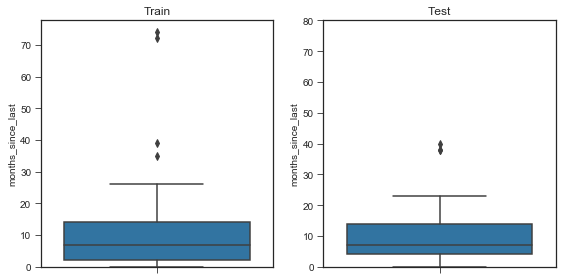

In [9]:
# create a boxplot comparing the months since last donation columns of the test and train sets

sns.set_style('ticks')
fig, ax= plt.subplots(1,2,sharey=True)
fig.set_size_inches(8, 4)

plt.subplot(1,2,1)
sns.boxplot( y=train['months_since_last'])
plt.ylim(0,)
plt.title('Train')

plt.subplot(1,2,2)
sns.boxplot(y=test['months_since_last'])
plt.ylim(0,80)
plt.title('Test')

plt.tight_layout()
plt.savefig('images/since_last_train_test.png')
plt.show()

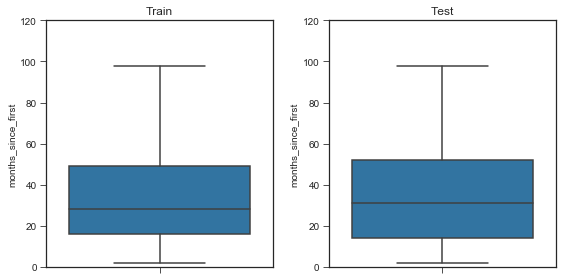

In [10]:
# create a boxplot comparing the months since first donation columns of the test and train sets

sns.set_style('ticks')
fig, ax= plt.subplots(1,2,sharey=True)
fig.set_size_inches(8, 4)

plt.subplot(1,2,1)
sns.boxplot( y=train['months_since_first'])
plt.ylim(0,120)
plt.title('Train')

plt.subplot(1,2,2)
sns.boxplot(y=test['months_since_first'])
plt.ylim(0,120)
plt.title('Test')

plt.tight_layout()
plt.savefig('images/since_first_train_test.png')
plt.show()

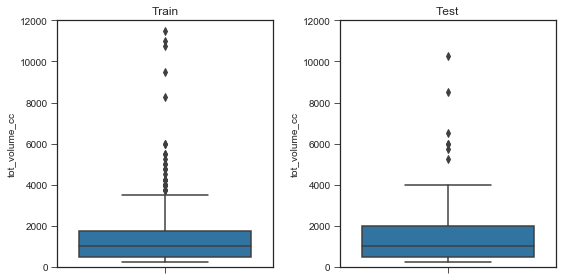

In [11]:
# create a boxplot comparing the volume columns of the test and train sets

sns.set_style('ticks')
fig, ax= plt.subplots(1,2,sharey=True)
fig.set_size_inches(8, 4)

plt.subplot(1,2,1)
sns.boxplot( y=train['tot_volume_cc'])
plt.ylim(0,12000)
plt.title('Train')

plt.subplot(1,2,2)
sns.boxplot(y=test['tot_volume_cc'])
plt.ylim(0,12000)
plt.title('Test')

plt.tight_layout()
plt.savefig('images/volume_train_test.png')
plt.show()

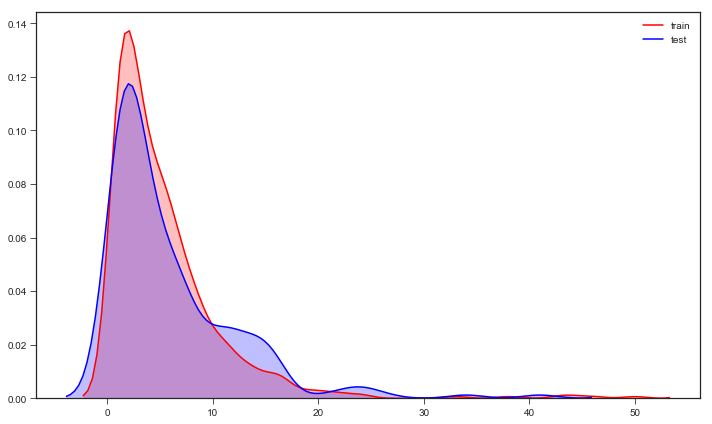

In [12]:
# create a KDE plot of the number of donations for the train and test sets

fig, ax= plt.subplots()
fig.set_size_inches(10, 6)
p1=sns.kdeplot(train['num_donations'], shade=True, color="r", label='train')
p1=sns.kdeplot(test['num_donations'], shade=True, color="b", label='test')
plt.legend()
plt.tight_layout()
plt.savefig('images/num_donations_train_test.png')
plt.show()


In [13]:
donated = train[train['donated_march_2017'] == 1]
didnot_donate = train[train['donated_march_2017'] == 0]

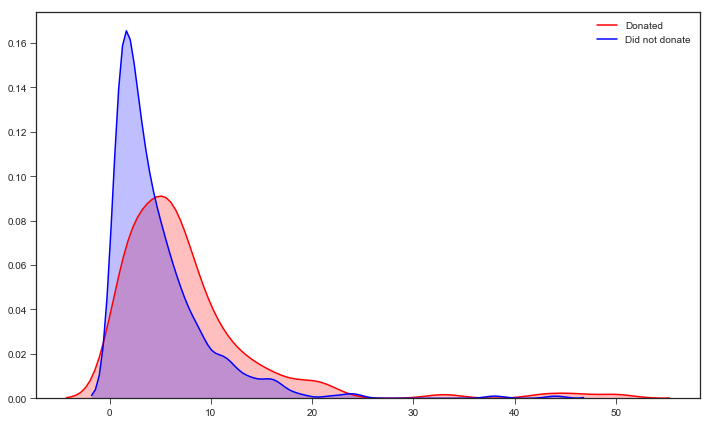

In [14]:
# create a KDE plot of the number of donations for those that donate and those that did not

fig, ax= plt.subplots()
fig.set_size_inches(10, 6)
p1=sns.kdeplot(donated['num_donations'], shade=True, color="r", label='Donated')
p1=sns.kdeplot(didnot_donate['num_donations'], shade=True, color="b", label='Did not donate')
plt.legend()
plt.tight_layout()
plt.savefig('images/num_donations_donated_didnot.png')
plt.show()

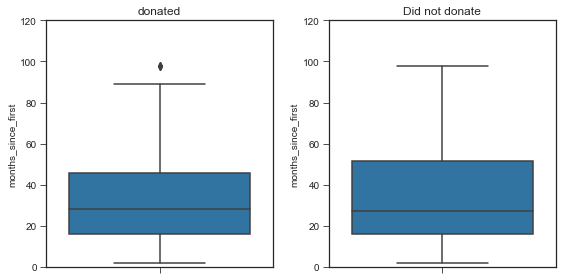

In [15]:
# create a boxplot comparing the months since first donation columns of those that donate vs those that did not

sns.set_style('ticks')
fig, ax= plt.subplots(1,2,sharey=True)
fig.set_size_inches(8, 4)

plt.subplot(1,2,1)
sns.boxplot( y=donated['months_since_first'])
plt.ylim(0,120)
plt.title('donated')

plt.subplot(1,2,2)
sns.boxplot(y=didnot_donate['months_since_first'])
plt.ylim(0,120)
plt.title('Did not donate')

plt.tight_layout()
plt.savefig('images/since_first_donated_didnot.png')
plt.show()

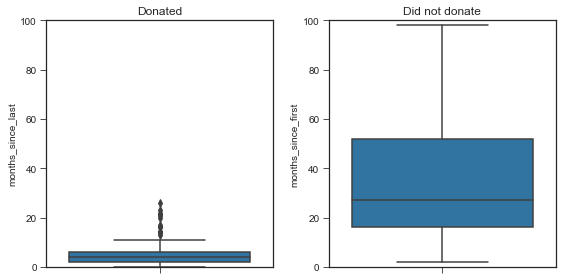

In [16]:
# create a boxplot comparing the months since last donation columns of those that donate vs those that did not

sns.set_style('ticks')
fig, ax= plt.subplots(1,2,sharey=True)
fig.set_size_inches(8, 4)

plt.subplot(1,2,1)
sns.boxplot( y=donated['months_since_last'])
plt.ylim(0,100)
plt.title('Donated')

plt.subplot(1,2,2)
sns.boxplot(y=didnot_donate['months_since_first'])
plt.ylim(0,100)
plt.title('Did not donate')

plt.tight_layout()
plt.savefig('images/since_last_donated_didnot.png')
plt.show()

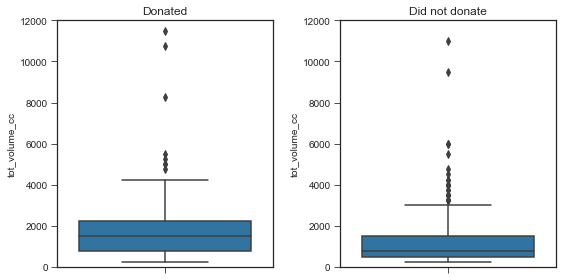

In [17]:
# create a boxplot comparing the volume columns of the test and train sets

sns.set_style('ticks')
fig, ax= plt.subplots(1,2,sharey=True)
fig.set_size_inches(8, 4)

plt.subplot(1,2,1)
sns.boxplot( y=donated['tot_volume_cc'])
plt.ylim(0,12000)
plt.title('Donated')

plt.subplot(1,2,2)
sns.boxplot(y=didnot_donate['tot_volume_cc'])
plt.ylim(0,12000)
plt.title('Did not donate')

plt.tight_layout()
plt.savefig('images/volume_donated_didnot.png')
plt.show()

## Engineer new feature

In [18]:
# calculate the probability that a person will donate monthly by dividing the total number of donations 
# with the months_since_first column
train['fraction_month'] = train['num_donations'] / train['months_since_first']
train.head()

,months_since_last,num_donations,tot_volume_cc,months_since_first,donated_march_2017,fraction_month
619,2,50,12500,98,1,0.510204
664,0,13,3250,28,1,0.464286
441,1,16,4000,35,1,0.457143
160,2,20,5000,45,1,0.444444
358,1,24,6000,77,0,0.311688


In [19]:
grouped = train.groupby('donated_march_2017')
grouped.mean()

,months_since_last,num_donations,tot_volume_cc,months_since_first,fraction_month
donated_march_2017,,,,,
0,10.636986,4.716895,1179.223744,34.319635,0.177850
1,5.637681,7.681159,1920.289855,33.195652,0.266147


In [20]:
# do the same for the test set
test['fraction_month'] = test['num_donations'] / test['months_since_first']
test.head()

,months_since_last,num_donations,tot_volume_cc,months_since_first,fraction_month
659,2,12,3000,52,0.230769
276,21,7,1750,38,0.184211
263,4,1,250,4,0.250000
303,11,11,2750,38,0.289474
83,4,12,3000,34,0.352941


In [21]:
columns_to_include = ['months_since_last','fraction_month','num_donations','tot_volume_cc', 'months_since_first']

In [22]:
# select columns to train for this model drop total volume since this is a functon of the num of donations
X_train = train[columns_to_include]
y_train = train['donated_march_2017']
X_test = test[columns_to_include]

In [23]:
# scale the values using MinMaxScaler

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

X_scaled_train = min_max_scaler.fit_transform(X_train)
X_normalized_train = pd.DataFrame(X_scaled_train, index = X_train.index, columns = X_train.columns)

X_normalized_train.head()

,months_since_last,fraction_month,num_donations,tot_volume_cc,months_since_first
619,0.027027,0.503495,1.000000,1.000000,1.000000
664,0.000000,0.456947,0.244898,0.244898,0.270833
441,0.013514,0.449706,0.306122,0.306122,0.343750
160,0.027027,0.436834,0.387755,0.387755,0.447917
358,0.013514,0.302259,0.469388,0.469388,0.781250


In [24]:
X_scaled_test = min_max_scaler.fit_transform(X_test)
X_normalized_test = pd.DataFrame(X_scaled_test, index = X_test.index, columns = X_test.columns)

X_normalized_test.describe()

,months_since_last,fraction_month,num_donations,tot_volume_cc,months_since_first
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.237375,0.309485,0.123375,0.123375,0.348698
std,0.190477,0.233910,0.153131,0.153131,0.261575
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.100000,0.125893,0.025000,0.025000,0.125000
50%,0.175000,0.259127,0.075000,0.075000,0.302083
75%,0.350000,0.420772,0.175000,0.175000,0.520833
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

logreg = LogisticRegression()
logreg.fit(X_normalized_train,y_train)
predict = logreg.predict(X_normalized_train)
proba = logreg.predict_proba(X_normalized_train)

log_loss(y_train,proba[:,1])

0.4949993494293301

In [26]:
predict_test = logreg.predict_proba(X_normalized_test)
submission = pd.DataFrame(predict_test[:,1], index = test.index, columns = ['Made Donation in March 2007'])
submission.to_csv('results/log_reg_vanilla.csv')

## Evaluating the model

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

conf_matrix = confusion_matrix(predict, y_train)
accuracy = accuracy_score(predict,y_train)
accuracy

0.7638888888888888

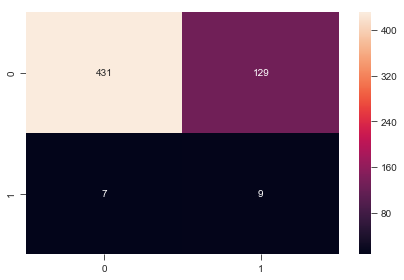

In [28]:
sns.heatmap(conf_matrix, annot = True, fmt='d')
plt.tight_layout()
plt.savefig('images/confusion_matrix.png')
plt.show()

In [29]:
print(classification_report(predict,y_train))

             precision    recall  f1-score   support

          0       0.98      0.77      0.86       560
          1       0.07      0.56      0.12        16

avg / total       0.96      0.76      0.84       576



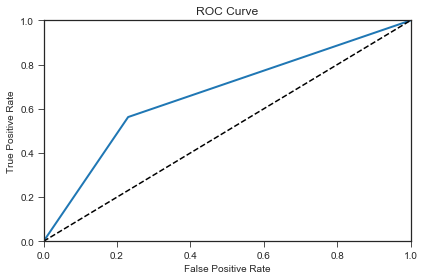

In [30]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(predict, y_train)

def plot_roc_curve(fpr, tpr, label=None): 
        plt.plot(fpr, tpr, linewidth=2, label=label) 
        plt.plot([0, 1], [0, 1], 'k--') 
        plt.axis([0, 1, 0, 1])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')

plot_roc_curve(fpr, tpr)
plt.tight_layout()
plt.savefig('images/roc_curve.png')
plt.show()


## Improving the model

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

sgd = SGDClassifier(loss='log', max_iter = 100000)
sgd.fit(X_normalized_train,y_train)
predict_sgd = sgd.predict(X_normalized_train)
proba_sgd = sgd.predict_proba(X_normalized_train)

log_loss(y_train,proba_sgd[:,1])

In [ ]:
conf_matrix_sgd = confusion_matrix(predict_sgd, y_train)
accuracy_sgd = accuracy_score(predict_sgd,y_train)
accuracy_sgd

In [ ]:
conf_sgd = conf_matrix_sgd

In [ ]:
predict_test = sgd.predict_proba(X_normalized_test)
submission = pd.DataFrame(predict_test[:,1], index = test.index, columns = ['Made Donation in March 2007'])
submission.to_csv('results/sgd.csv')

In [ ]:
print(classification_report(predict_sgd,y_train))

In [ ]:
sns.heatmap(conf_sgd, annot = True, fmt='d')
plt.tight_layout()
plt.savefig('images/confusion_matrix_sgd.png')
plt.show()

In [ ]:
# import the modules, build the classifier, train on the data, and make predictions

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time

start_time = time.time()

# populate the parameter grid
param_grid = {"max_depth": list(range(1,10)),
              "max_features": list(range(1,4)),
              "min_samples_leaf": list(range(1,20)),
              "criterion": ["gini", "entropy"]}


clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf,param_grid,cv=5)
grid_search.fit(X_normalized_train,y_train)

print('Training set score for Decision Tree: {:.10f}'.format(grid_search.score(X_normalized_train,y_train)))
print('Best parameters: {}'.format(grid_search.best_params_))
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
prob_tree = grid_search.predict_proba(X_normalized_test)
predict_tree = grid_search.predict(X_normalized_train)
conf_tree = confusion_matrix(grid_search.predict(X_normalized_train),y_train)

In [ ]:
conf_tree

In [ ]:
print(classification_report(predict_tree,y_train))

In [ ]:
submission = pd.DataFrame(prob_tree[:,1], index = test.index, columns = ['Made Donation in March 2007'])
submission.to_csv('results/tree.csv')